# **Brain Tumor**

# Setting up the Environment

In [ ]:
#import libraries

#Numpy provides many functions of high-level operations on files and collections of files
import numpy as np
#Tqdm is a library in Python which is used for creating Progress Meters
from tqdm import tqdm
#OpenCV is a library of programming functions mainly aimed at real-time computer vision
import cv2
#The OS module in Python provides functions for interacting with the operating system
import os
#Shutil provides many functions of high-level operations on files and collections of files
import shutil
#Itertool is a module that provides various functions that work on iterators to produce complex iterators
import itertools
#Imutils are functions to make basic image processing functions
import imutils
#Matplotlib is a library for creating static, animated, and interactive visualizations in Python. 
import matplotlib.pyplot as plt
#LB is used to convert multi-class lables to binary labels
from sklearn.preprocessing import LabelBinarizer
#split the dataset
from sklearn.model_selection import train_test_split
#compute subset accuracy and summary of predicted results
from sklearn.metrics import accuracy_score, confusion_matrix

#Plot library that supports over 40 unique charts
#Graph_objs imports definitions for all of Plotly's graph objects.
import plotly.graph_objs as go
#graphs offline and save them in local machine. 
from plotly.offline import iplot, init_notebook_mode
from plotly import tools

import tensorflow as tf
from tensorflow import keras 
#Augment your images in real-time while your model is still training!
from keras.preprocessing.image import ImageDataGenerator
#Import VGG16 Model
from keras.applications.vgg16 import VGG16, preprocess_input
#Layers are the basic building blocks of neural networks 
from keras import layers
#from keras.models import Model, Sequential
from keras.models import Model, Sequential
#import model optimizer & Gradient descent 
from tensorflow.keras.optimizers import Adam, RMSprop
#early stopping is a form of regularization used to avoid overfitting
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED =123

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/usr/local/lib/p

In [ ]:
#The dataset is stored locally in a google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Defining the path to the data directory
Path = '/content/drive/MyDrive/SaaS/AI/archive/'
os.listdir(Path)

['.DS_Store', 'brain_tumor_dataset', 'no', 'yes']

In [ ]:
#tqdm is a library in Python which is used for creating Progress Meters
!pip install tdqm
!pip install imutils

In [ ]:
#clear the output of a cell.
from IPython.display import clear_output

!apt-get install tree
clear_output()

#create new folders
!mkdir TRAIN TEST VAL TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO
!tree -d

mkdir: cannot create directory ‘TRAIN’: File exists
mkdir: cannot create directory ‘TEST’: File exists
mkdir: cannot create directory ‘VAL’: File exists
mkdir: cannot create directory ‘TRAIN/YES’: File exists
mkdir: cannot create directory ‘TRAIN/NO’: File exists
mkdir: cannot create directory ‘TEST/YES’: File exists
mkdir: cannot create directory ‘TEST/NO’: File exists
mkdir: cannot create directory ‘VAL/YES’: File exists
mkdir: cannot create directory ‘VAL/NO’: File exists
.
├── ComputerVision
│   └── BrainTumor
│       └── Annotation
├── drive
│   └── MyDrive
│       ├── App Prototype
│       ├── Audio Interview with Dr Stephen (25 11 2017)
│       ├── Cancer Clinic
│       │   └── Financial Model
│       ├── Colab Notebooks
│       ├── Doctor Little Kenya
│       │   ├── Githurai Medical Camp Materials
│       │   ├── Kakamega
│       │   │   ├── Iguhu
│       │   │   ├── Shibwe
│       │   │   │   ├── 2018
│       │   │   │   └── 2019
│       │   │   └── Surgery Pics
│       │   ├

In [ ]:
img_path = '/content/drive/MyDrive/SaaS/AI/archive/brain_tumor_dataset/'

#split the data into train/val/test folders
for CLASS in os.listdir(img_path):
    #Return True if Class starts with the specified prefix
    if not CLASS.startswith('.'):
        #Return the number of items in the directory
        img_num = len(os.listdir(img_path + CLASS))
        
        for (n, FILE_NAME) in enumerate(os.listdir(img_path + CLASS )):
            img = img_path + CLASS + '/' + FILE_NAME
            if n < 5:
                #Copy data and mode bits. Return's the file's destination.
                shutil.copy(img, 'TEST/' + CLASS.upper() + '/' + FILE_NAME)
            elif n < 0.8*img_num:
                shutil.copy(img, 'TRAIN/' + CLASS.upper() + '/' + FILE_NAME)
            else:
                shutil.copy(img, 'VAL/'+ CLASS.upper() + '/' + FILE_NAME)

# **Data Import and Preprocessing**

In [ ]:
def load_data(dir_path, img_size = (150,150)):
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        ' Decorate an iterable object, returning an iterator which acts exactly'
        ' like the original iterable, but prints a dynamically updating'
        ' progressbar every time a value is requested.'
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i +=1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded {dir_path} directory.')
    return X, y, labels

In [ ]:
train_dir = 'TRAIN/'
test_dir = 'TEST/'
val_dir = 'VAL/'
img_size = (224,224)

X_train, y_train, labels = load_data(train_dir, img_size)
X_test, y_test,_ = load_data(test_dir, img_size)
X_val, y_val, _= load_data(val_dir,img_size)

100%|██████████| 2/2 [00:00<00:00,  4.01it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



193 images loaded TRAIN/ directory.


100%|██████████| 2/2 [00:00<00:00, 80.23it/s]


10 images loaded TEST/ directory.


100%|██████████| 2/2 [00:00<00:00, 11.93it/s]

50 images loaded VAL/ directory.


In [ ]:
y = dict()
y[0] = []
y[1] = []

for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))
    
trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name= 'No',
    marker=dict(color='#33cc00'),
    opacity=0.7   
)

trace1 =  go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name= 'Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7   
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig) 

In [ ]:
#Create a gridplot for desired number of images (n) from the specified set
def plot_samples(X, y, labels_dict, n=50):
    for index in range(len(labels_dict)):
        #Find the indices of array elements that are non-zero, grouped by element.
        imgs = X[np.argwhere(y==index)][:n]
        j = 10
        i = int(n/j)
        
        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])
            
            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor:{}'.format(labels_dict[index]))
        plt.show()

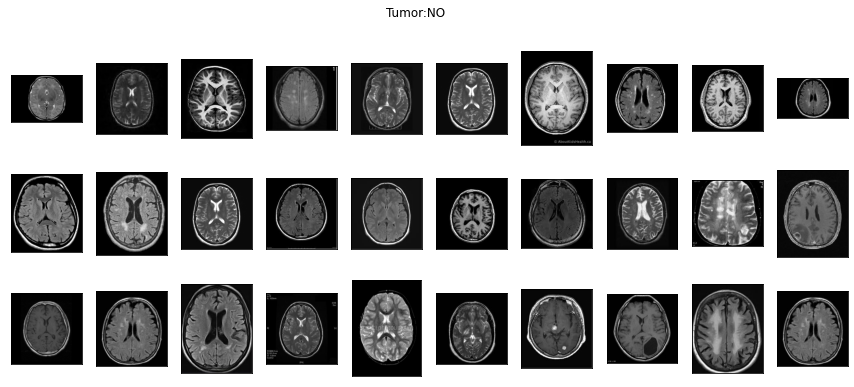

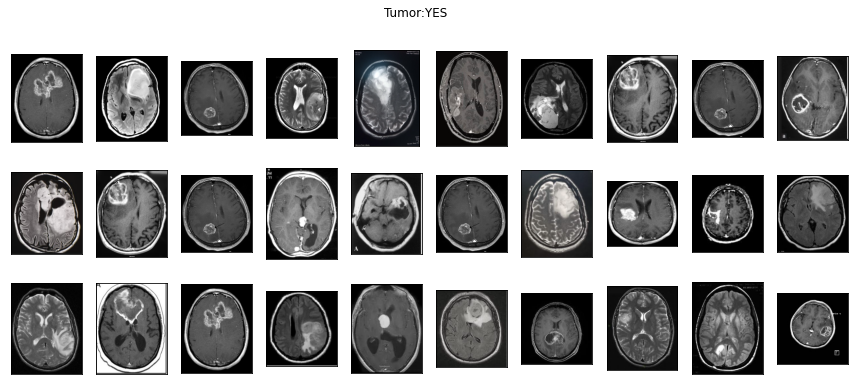

In [ ]:
plot_samples(X_train, y_train, labels, 30)

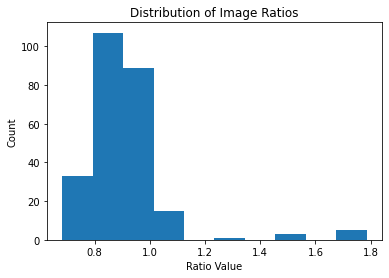

In [ ]:
ratio_list = []
for set in (X_train, X_test, X_val):
    for img in set:
        ratio_list.append(img.shape[1]/img.shape[0])
        
plt.hist(ratio_list)
plt.title("Distribution of Image Ratios")
plt.xlabel("Ratio Value")
plt.ylabel('Count')
plt.show()

# **Finding extreme points in contours with OpenCV**

We begin image preprocessing by finding he extreme north, south, east, and west (x, y)-coordinates along a contour in the images. The images are loaded converted to grayscale and slightly blured. They are then thresholded and a series of erosions and dilations are executed to remove and small regions of noise. Contours are found in the thresholded images and the largest are grabbed which in this case will be the skull. A contour is simply a NumPy array of (x, y)-coordinates. Therefore, we can leverage NumPy functions to help us find the extreme coordinates.

***Example of an image after thresholding. The outlines of the hand are now revealed.***

<img src="https://www.pyimagesearch.com/wp-content/uploads/2016/04/extreme_points_thresh.jpg" width="400" height="400" align = "centre" > 


In [ ]:
def crop_imgs(set_name, add_pixels_value=0):
    set_new = []
    for img in set_name:
        
        #The function converts an input image from one color space to another.
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        #Blurs an image using a Gaussian filter.
        gray = cv2.GaussianBlur(gray, (5, 5), 0)
        
        #Applies a fixed-level threshold to each array element.
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        #dilates the source image using the specified structuring element.
        #determines the shape of a pixel neighborhood over which the maximum is taken
        thresh = cv2.dilate(thresh, None, iterations=2)
        
        'In order to detect the outlines of the hand, we make a call to cv2.findContours '
        #retrieves contours from the binary image 
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)
        
        #find extreme image points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])
        
        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)
        
    return np.array(set_new)

In [ ]:
#Now that we have our extreme north, south, east, and west coordinates, we can draw them on our image :

img = cv2.imread('/content/drive/MyDrive/SaaS/AI/archive/brain_tumor_dataset/yes/Y184.JPG')
img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
#converts the input image from one color space to another.
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#Blurs the image using a Gaussian filter.
gray = cv2.GaussianBlur(gray, (5, 5), 0)

thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

#add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()


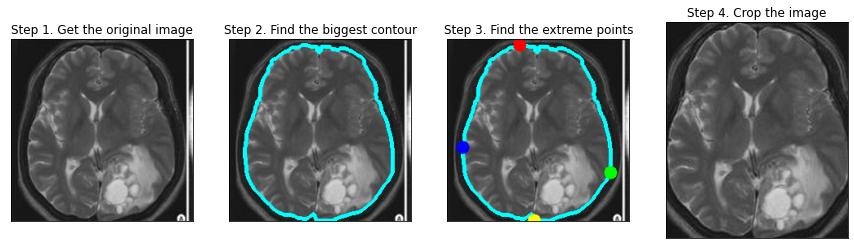

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [ ]:
# apply this for each set
X_train_crop = crop_imgs(set_name=X_train)
X_val_crop = crop_imgs(set_name=X_val)
X_test_crop = crop_imgs(set_name=X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



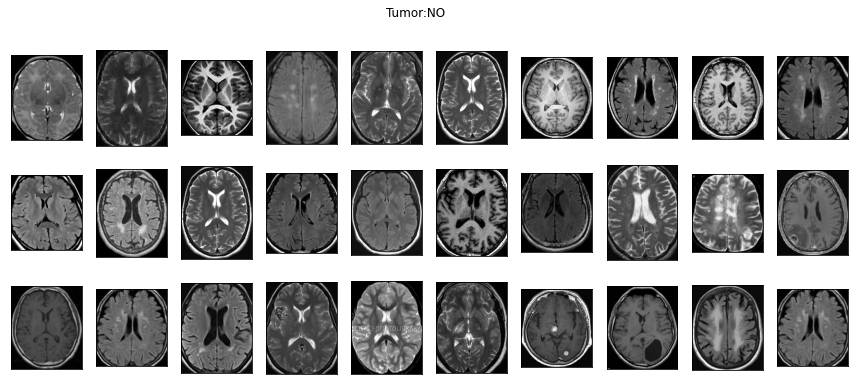

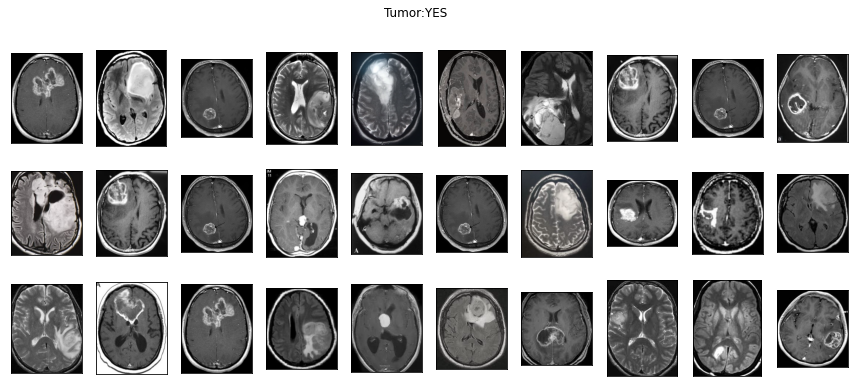

In [ ]:
plot_samples(X_train_crop, y_train, labels, 30)

In [ ]:
# apply this for each set
X_train_crop = crop_imgs(set_name=X_train)
X_val_crop = crop_imgs(set_name=X_val)
X_test_crop = crop_imgs(set_name=X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



# **Mask R-CNN** 

1. # **Importing and cloning repositories.**

First, we will clone a repository that contains some of the building code blocks for implementing Mask RCNN.

At the time of writing this tutorial, the project has 4 directories:

1. **mrcnn**: This is the core directory that holds the project's Python code.
2. **Train**: Images to train the model.
3. **Test**: A collection of test images.
4. **Val**: Images for model valuation.

In [ ]:
#This is as simple as running the following command from your command line:
from IPython.display import clear_output
!git clone https://www.github.com/matterport/Mask_RCNN.git
!git clone https://github.com/richiejeremiah/ComputerVision.git
!pip install pycocotools
!pip install -r requirements.txt
!python setup.py install

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.
fatal: destination path 'ComputerVision' already exists and is not an empty directory.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [ ]:
def get_ax(rows=1, cols=1, size=7):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

# **2. Selection of right versions of libraries**

It is important to downgrade tensorflow and Keras libraries  inorder to implement the Mask RCNN architecture without getting any errors.

In [ ]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py -y

!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

Found existing installation: Keras 2.0.8
Uninstalling Keras-2.0.8:
  Successfully uninstalled Keras-2.0.8
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: tensorflow 1.13.1
Uninstalling tensorflow-1.13.1:
  Successfully uninstalled tensorflow-1.13.1
Found existing installation: h5py 2.10.0
Uninstalling h5py-2.10.0:
  Successfully uninstalled h5py-2.10.0
  Using cached tensorflow-1.13.1-cp37-cp37m-manylinux1_x86_64.whl (92.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached h5py-3.5.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (4.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.13.1 which is incompatible.


  Using cached Keras-2.0.8-py2.py3-none-any.whl (276 kB)


  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.5.0
    Uninstalling h5py-3.5.0:
      Successfully uninstalled h5py-3.5.0



**The COCO API - http://cocodataset.org/ COCO is a large image dataset designed for object detection, segmentation, person keypoints detection, stuff segmentation, and caption generation.**

In [ ]:
#pycocotools is a Python API that assists in loading, parsing and visualizing the annotations in COCO.

!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!pip install "git+https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"
!ls -lh mask_rcnn_coco.h5

# path to the trained weights file
COCO_WEIGHTS_PATH = 'mask_rcnn_coco.h5'

  Cloning https://github.com/philferriere/cocoapi.git to /tmp/pip-install-xj_ampbz/pycocotools_09a97e1d2be34f7184a6a9bb5d36920f
  Running command git clone -q https://github.com/philferriere/cocoapi.git /tmp/pip-install-xj_ampbz/pycocotools_09a97e1d2be34f7184a6a9bb5d36920f
-rw-r--r-- 1 root root 246M Nov 26  2017 mask_rcnn_coco.h5


# **3. Configuration according to our dataset**

We will give the path to the trained weights file. This could be the model weights file or your last saved weights file (checkpoint). The log directory is where all our data will be stored when training begins. The model weights at every epoch are saved in .h5 format in the directory so if the training gets hindered due to any reason you can always start from where you left off by specifying the path to the last saved model weights. For instance, if I am training my model for 10 epochs and at epoch 3 my training is obstructed then I will have 3 .h5 files stored in my logs directory. And now I do not have to start my training from the beginning.

In [ ]:
#set up additional libraries
import random
import json
#skimage is a collection of algorithms for image processing and computer vision.
#Draw primitives (lines, text, etc.) that operate on NumPy arrays
import skimage.draw 
import sys
import keras
from keras import backend as K
from tensorflow.python.keras.layers import Layer

# Root directory of the project
root_dir = os.path.abspath('/content/Mask_RCNN')
#Import Mask RCNN
#Add a specific path for interpreter to search.
sys.path.append(root_dir)# To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
from mrcnn.model import log
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.visualize import display_images

# Import COCO config
sys.path.append(os.path.join(root_dir, 'samples/coco/'))

plt.rcParams['figure.facecolor'] = 'white'

clear_output()

In [ ]:
# directory to save logs and trained model
model_dir = os.path.join(root_dir, 'logs')
# Directory to save logs and model checkpoints
default_logs_dir = 'logs'
# directory with annotations for train/val sets
# directory with image data
DATASET_DIR = '/content/drive/MyDrive/SaaS/AI/Dataset'

# Path to trained weights file
coco_model_path = os.path.join(root_dir, 'mask_rcnn_coco.h5')

# Download COCO trained weights from Releases if needed
if not os.path.exists(coco_model_path):
    utils.download_trained_weights(coco_model_path)


... done downloading pretrained model!


CustomConfig class contains our custom configurations for the model. We simply overwrite the data in the original Config class from the config.py file that was imported earlier. The number of classes is supposed to be total_classes + 1 (for background). 

In [ ]:
class TumorConfig(Config):
    """Configuration for training on the brain tumor dataset.
    """
    # Give the configuration a recognizable name
    NAME = 'tumor_detector'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1  # background + tumor
    DETECTION_MIN_CONFIDENCE = 0.90    
    STEPS_PER_EPOCH = 100
    LEARNING_RATE = 0.001
    
config = TumorConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

# **4. Setting up the CustomDataset class**

The class below contains 3 crucial methods for our custom dataset. This class inherits from “utils.Dataset” which we imported in the 1st step. The ‘load_custom’ method is for saving the annotations along with the image. Here we extract polygons and the respective classes.

polygons = [r[‘shape_attributes’] for r in a[‘regions’]]

objects = [s[‘region_attributes’][‘name’] for s in a[‘regions’]]

Polygons variable contains the coordinates of the masks. Objects variable contains the names of the respective classes.

The ‘load_mask’ method loads the masks as per the coordinates of polygons. The mask of an image is nothing but a list containing binary values. Skimage.draw.polygon() does the task for us and returns the indices for the coordinates of the mask.

In [ ]:
class BrainScanDataset(utils.Dataset):

    def load_brain_scan(self, dataset_dir, subset):
        """Load a subset of the brain tumor dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have only one class to add.
        self.add_class("tumor", 1, "tumor")
 
        # Train or validation dataset?
        assert subset in ["train", "test", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)


        # Load annotations
        # VGG Image Annotator saves each image in the form:
        # { 'filename': '28503151_5b5b7ec140_b.jpg',
        #   'regions': {
        #       '0': {
        #           'region_attributes': {},
        #           'shape_attributes': {
        #               'all_points_x': [...],
        #               'all_points_y': [...],
        #               'name': 'polygon'}},
        #       ... more regions ...
        #   },
        #   'size': 100202
        # }
        # We mostly care about the x and y coordinates of each region


        annotations1 = json.load(open(os.path.join(dataset_dir, "via_region_data.json")))
        annotations = list(annotations1.values())
        
         # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.

        annotations = [a for a in annotations if a['regions']]
        
        # Add images
        for a in annotations:
            # Get the x, y coordinaets of points of the polygons that make up
            # the outline of each object instance. These are stores in the
            # shape_attributes (see json format above)
            # The if condition is needed to support VIA versions 1.x and 2.x.
            if type(a['regions']) is dict:
                polygons = [r['shape_attributes'] for r in a['regions'].values()]
            else:
                polygons = [r['shape_attributes'] for r in a['regions']]

            # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            image_path = os.path.join(dataset_dir, a['filename'])
            #Load an image from file.
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "tumor",
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, 
                height=height,
                polygons=polygons
            )

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a farm_cow dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "tumor":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
            mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID only, we return an array of 1s
        return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "tumor":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

# **5. Setup**

This step is for setting up the model for training and downloading and loading pre-trained weights. You can load the weights of COCO or your last saved model.
The call ‘modellib.MaskRCNN()’ is the step where you can get lots of errors if you have not chosen the right versions in the 2nd section. This method has a parameter ‘mode’ which decides whether we want to train the model or test the model. If you want to test set ‘mode’ to ‘inference’. ‘model_dir’ is for saving the data while training for backup. Then, we download the pre-trained COCO weights in the next step.

**Note: If you want to resume training from a saved point then you need to change ‘weights_path’ to the path where your .h5 file is stored.**

In [ ]:
model = modellib.MaskRCNN(
    mode='training', 
    config=config, 
    model_dir=default_logs_dir
)

model.load_weights(
    coco_model_path, 
    by_name=True, exclude=[
            "mrcnn_class_logits", "mrcnn_bbox_fc",
            "mrcnn_bbox", "mrcnn_mask"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


# **6. Creating Train() function**
First, we will create an instance of CustomDataset class for the training dataset. Similarly, create another instance for the validation dataset. Then we will call the load_custom() method by passing in the name of the directory where our data is stored. ‘layers’ parameter is set to ‘heads’ here as I am not planning to train all the layers in the model. This will only train some of the top layers in the architecture. If you want you can set ‘layers’ to ‘all’ for training all the layers in the model.


In [ ]:
# Training dataset.
dataset_train = BrainScanDataset()
dataset_train.load_brain_scan(DATASET_DIR, 'train')
dataset_train.prepare()

# Validation dataset
dataset_val = BrainScanDataset()
dataset_val.load_brain_scan(DATASET_DIR, 'val')
dataset_val.prepare()

dataset_test = BrainScanDataset()
dataset_test.load_brain_scan(DATASET_DIR, 'test')
dataset_test.prepare()



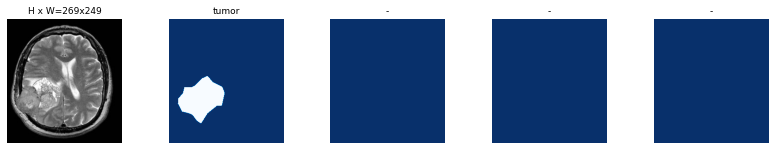

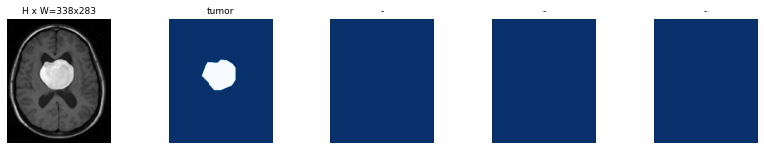

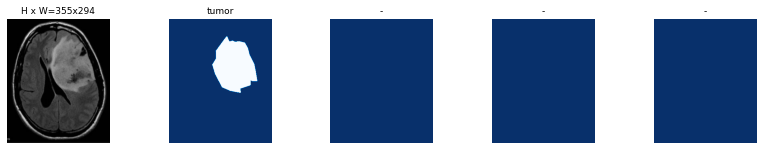

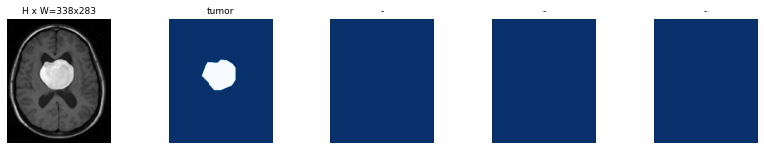

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
# Since we're using a very small dataset, and starting from
# COCO trained weights, we don't need to train too long. Also,
# no need to train all layers, just the heads should do it.
print("Training network heads")
model.train(
    dataset_train, dataset_val,
    learning_rate=config.LEARNING_RATE,
    epochs=5,
    layers='heads'
)

Training network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: logs/tumor_detector20211110T1314/mask_rcnn_tumor_detector_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistri

/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1987: UserWarning:

Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.



Epoch 1/5
 99/100 [============================>.] - ETA: 62s - loss: 1.9107 - rpn_class_loss: 0.0243 - rpn_bbox_loss: 0.6558 - mrcnn_class_loss: 0.1461 - mrcnn_bbox_loss: 0.6270 - mrcnn_mask_loss: 0.4575 

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2142: UserWarning:

Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.



100/100 [==============================] - 7493s - loss: 1.9047 - rpn_class_loss: 0.0241 - rpn_bbox_loss: 0.6526 - mrcnn_class_loss: 0.1453 - mrcnn_bbox_loss: 0.6267 - mrcnn_mask_loss: 0.4561 - val_loss: 1.4052 - val_rpn_class_loss: 0.0159 - val_rpn_bbox_loss: 0.5632 - val_mrcnn_class_loss: 0.0654 - val_mrcnn_bbox_loss: 0.4632 - val_mrcnn_mask_loss: 0.2975
Epoch 2/5
100/100 [==============================] - 7409s - loss: 1.2558 - rpn_class_loss: 0.0160 - rpn_bbox_loss: 0.3932 - mrcnn_class_loss: 0.0664 - mrcnn_bbox_loss: 0.4556 - mrcnn_mask_loss: 0.3245 - val_loss: 1.4725 - val_rpn_class_loss: 0.0183 - val_rpn_bbox_loss: 0.7491 - val_mrcnn_class_loss: 0.0419 - val_mrcnn_bbox_loss: 0.3870 - val_mrcnn_mask_loss: 0.2761
Epoch 3/5
100/100 [==============================] - 7382s - loss: 0.9335 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.2564 - mrcnn_class_loss: 0.0634 - mrcnn_bbox_loss: 0.3186 - mrcnn_mask_loss: 0.2831 - val_loss: 0.9995 - val_rpn_class_loss: 0.0122 - val_rpn_bbox_loss: 0

# **8. Testing**

Here, we define the path to our last saved weights file to run the inference on. Then, we define simple configuration terms and load the model to run inference.

***Deep learning inference is the process of using a trained DNN model to make predictions against previously unseen data.***

In [ ]:
# Recreate the model in inference mode
model = modellib.MaskRCNN(
    mode="inference", 
    config=config,
    model_dir=default_logs_dir
)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)


Loading weights from  logs/tumor_detector20211110T1314/mask_rcnn_tumor_detector_0004.h5
Re-starting from epoch 4


# **9. Visualize the Results**



In [ ]:
def predict_and_plot_differences(dataset, img_id):
    original_image, image_meta, gt_class_id, gt_box, gt_mask =\
        modellib.load_image_gt(dataset, config, 
                               img_id, use_mini_mask=False)

    results = model.detect([original_image], verbose=0)
    r = results[0]

    visualize.display_differences(
        original_image,
        gt_box, gt_class_id, gt_mask,
        r['rois'], r['class_ids'], r['scores'], r['masks'],
        class_names = ['tumor'], title="", ax=get_ax(),
        show_mask=True, show_box=True)

In [ ]:
def display_image(dataset, ind):
    plt.figure(figsize=(5,5))
    plt.imshow(dataset.load_image(ind))
    plt.xticks([])
    plt.yticks([])
    plt.title('Original Image')
    plt.show()

After the function is executed, a figure is shown (as seen below) on which the boxes, masks, class scores, and labels are drawn.

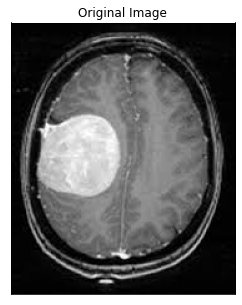

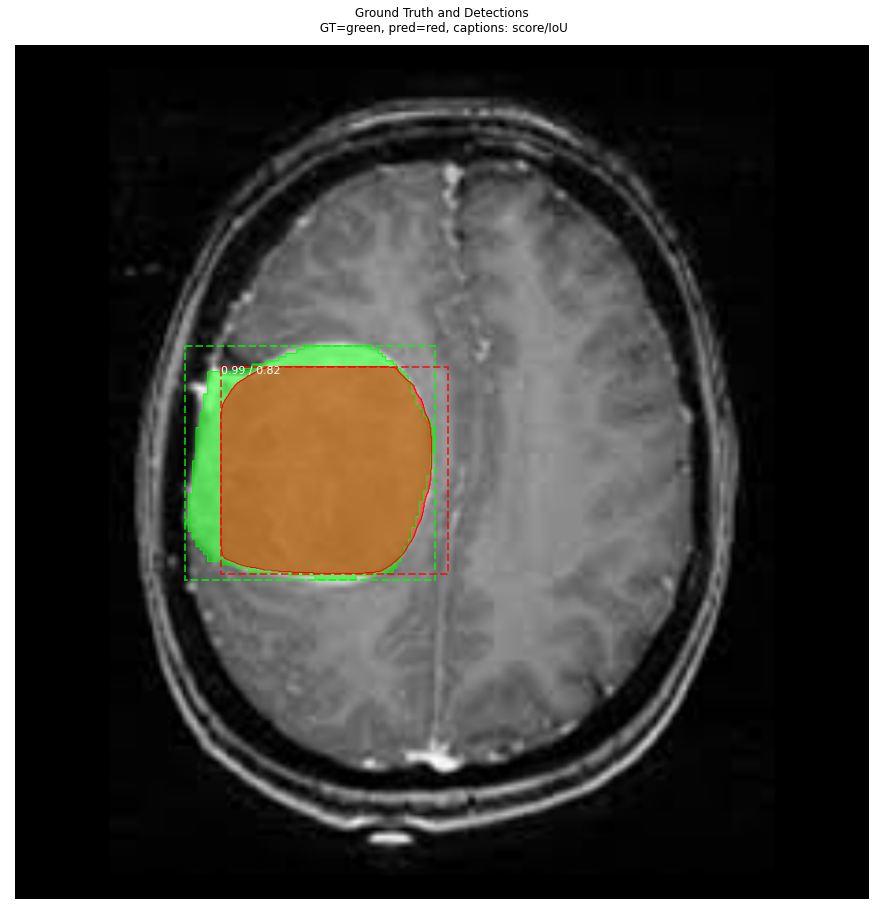

In [ ]:
#valuation datatest
ind = 0
display_image(dataset_val, ind)
predict_and_plot_differences(dataset_val, ind)

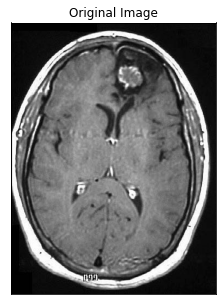

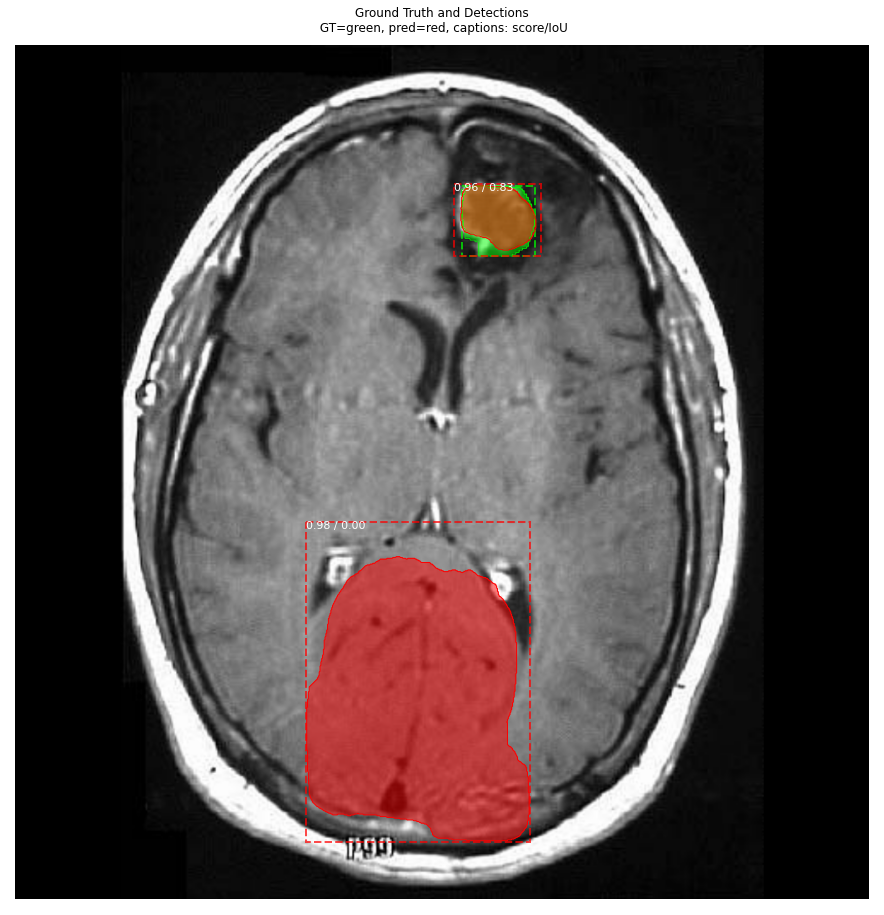

In [ ]:
ind = 10
display_image(dataset_val, ind)
predict_and_plot_differences(dataset_val, ind)


**We now try to test the model**

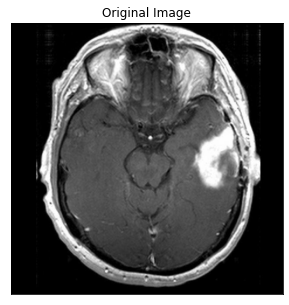

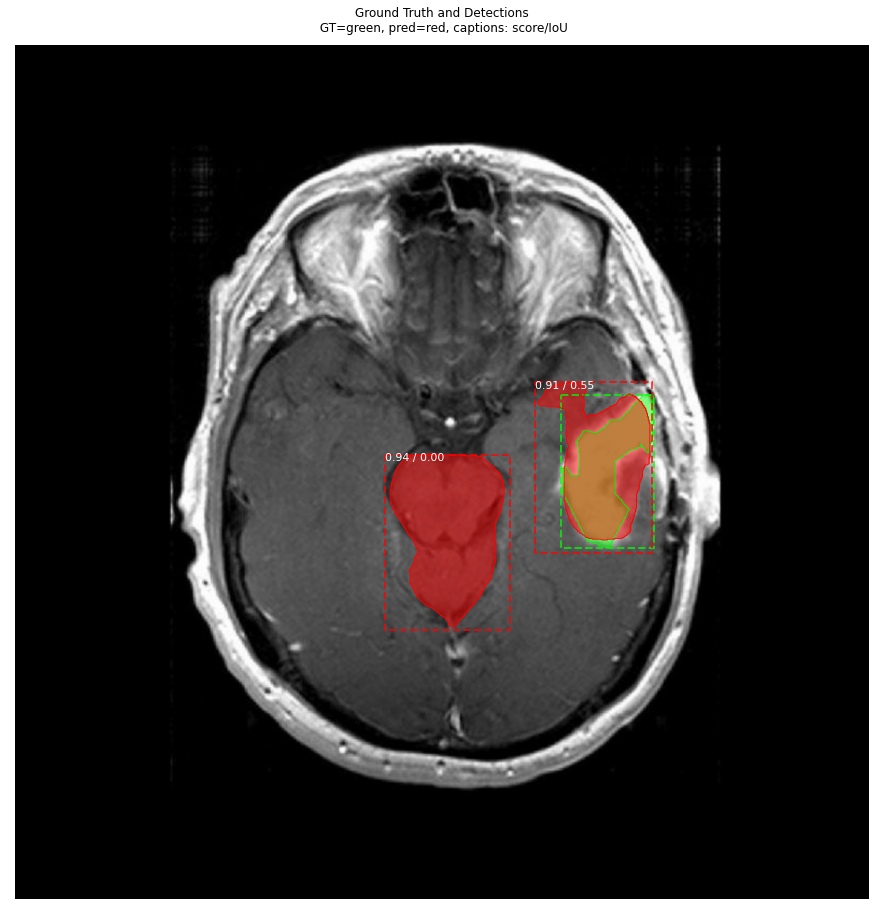

In [ ]:
ind = 0
display_image(dataset_test, ind)
predict_and_plot_differences(dataset_test, ind)


# **Conclusion**

This tutorial introduced the open-source Python project Mask_RCNN, which builds the Mask R-CNN model for object instance segmentation. The poor performance of the model on the valuation dataset is as expected due to a small dataset however implementing it was a success.
